# Setup

In [2]:
%run setup.ipynb
from helper_functions import *

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# K-NN Classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def knn_classifier(X_train, y_train, X_test, y_test, n_neighbors=5, leaf_size=10, p=2):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, p=p)

    knn.fit(X_train, y_train)
    print("Training accuracy: {:.2f}".format(knn.score(X_train, y_train)))

    y_pred = knn.predict(X_test)
    return confusion_matrix(y_test, y_pred)

In [4]:
from sklearn.model_selection import train_test_split

X = heart_failure_df.drop(target_col_name, axis=1)
encode_categorical_features(X)
y = heart_failure_df[target_col_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training accuracy: 0.79


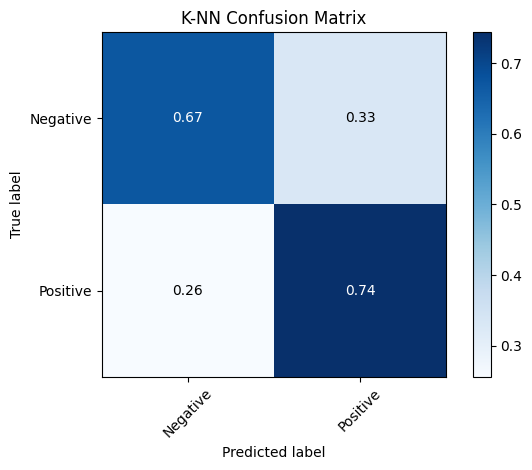

In [5]:
cm = knn_classifier(X_train, y_train, X_test, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'K-NN Confusion Matrix')

### Lets see if scaling helps K-NN

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.46471433,  0.54494926, -0.80057251, ..., -0.83034552,
        -0.7294597 ,  1.06618689],
       [ 0.78176703,  0.54494926, -0.80057251, ...,  1.20431793,
         0.99028313, -2.29741008],
       [-0.06370685,  0.54494926,  1.34542979, ...,  1.20431793,
        -0.81997248, -0.61561159],
       ...,
       [ 0.6760828 ,  0.54494926, -0.80057251, ...,  1.20431793,
         0.44720645,  1.06618689],
       [ 0.6760828 ,  0.54494926, -0.80057251, ...,  1.20431793,
        -0.81997248,  1.06618689],
       [-1.43760192, -1.83503323, -0.80057251, ..., -0.83034552,
         0.99028313, -0.61561159]])

Training accuracy: 0.88


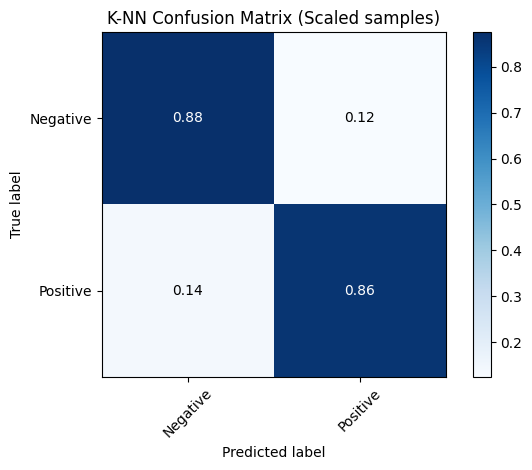

In [7]:
cm = knn_classifier(X_train_scaled, y_train, X_test_scaled, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'K-NN Confusion Matrix (Scaled samples)')

### It does helps a lot!

### Try frequency encoding

In [8]:
X = heart_failure_df.drop(target_col_name, axis=1)
encode_categorical_features_as_frequency_encoding(X)
y = heart_failure_df[target_col_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training accuracy: 0.86


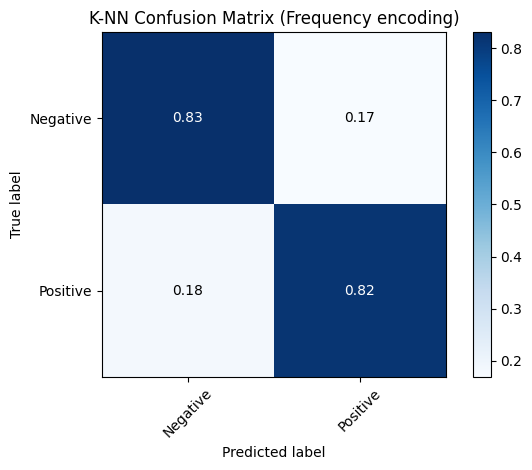

In [9]:
cm = knn_classifier(X_train, y_train, X_test, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'K-NN Confusion Matrix (Frequency encoding)')

### Worse results, let just do normal Label encoding

# Hyperparams

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'leaf_size': 10, 'n_neighbors': 11, 'p': 1}
Best score: 0.8613977713178294


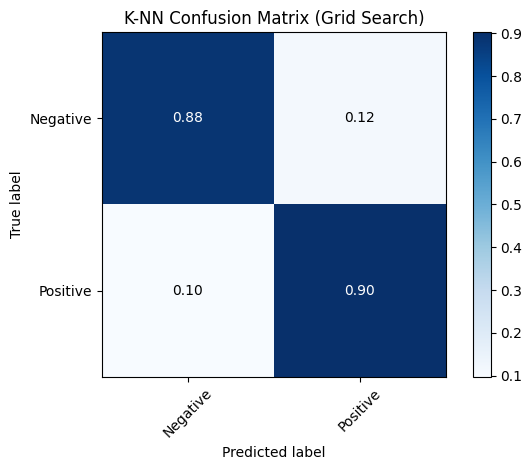

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_neighbors': [5, 7, 9, 11],
    'leaf_size': [10, 20, 30], # prevent overfitting
    'p': [1, 2]
}

knn = KNeighborsClassifier()
# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn, param_grid, cv=cv, n_jobs=-1, verbose=1)

# re-encode the features
X = heart_failure_df.drop(target_col_name, axis=1)
encode_categorical_features(X)
y = heart_failure_df[target_col_name]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, normalize=True, title=f'K-NN Confusion Matrix (Grid Search)')